# PDS federated API demo, Osiris-Rex OVIRS data visualization

The purpose of this notebook is to demostrate how the PDS web API can be used to access the PDS data for a scientific use case. The documention of the PDS web API is available on https://nasa-pds.github.io/pds-api/

WARNING: This notebook is a demo and not a real scientific use case. It might contain mistake in the way the data is used or displayed.

In [188]:
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from astropy.io import fits

The PDS API is accessed using a python client library documented on https://nasa-pds.github.io/pds-api-client/

In [189]:
import pds.api_client as pds_api

## Use the PDS demo web API server 

Connect to the demo server. See User Interface of the web API: http://pds-gamma.jpl.nasa.gov/api/swagger-ui.html


In [190]:
configuration = pds_api.Configuration()

# demo server
configuration.host = 'http://pds-gamma.jpl.nasa.gov/api/'

# dev server
# configuration.host = "http://localhost:8080/"

api_client = pds_api.ApiClient(configuration)


## Get the lidvid of your collection of interest

Search for a collection of interest on https://pds.nasa.gov/datasearch/keyword-search/ (or https://pds.nasa.gov > Data Search > Keyword Search):
- Search for "osiris rex ovirs collection" (https://pds.nasa.gov/datasearch/keyword-search/search.jsp?q=osiris+rex+ovirs+collection)
- Click on the first collection on the results
- Copy the lidvid


## Get the properties available for the observational products belonging to the selected collection

Get the properties available for the product belonging to the collection of interest using CollectionsProductsApi.products_of_a_collection (see https://nasa-pds.github.io/pds-api-client/api/api_client.api.html#api_client.api.collections_products_api.CollectionsProductsApi)

In [200]:
lidvid = 'urn:nasa:pds:orex.ovirs:data_calibrated::10.0'
#lidvid = 'urn:nasa:pds:izenberg_pdart14_meap:data_imagecube::1.0'
collection_products_api = pds_api.CollectionsProductsApi(api_client)
api_response = collection_products_api.products_of_a_collection(lidvid , start=0, limit=20, only_summary=True)
available_properties = api_response.to_dict()['summary']['properties']
print(f"The available properties for the selected products are {available_properties}")

The available properties for the selected products are ['orex:spatial.orex:bennu_radec_target', 'pds:Modification_Detail.pds:description', 'pds:Axis_Array.pds:axis_name', 'pds:Local_Internal_Reference.pds:local_reference_type', 'pds:File.pds:file_size', 'pds:Modification_Detail.pds:modification_date', 'orex:spatial.orex:sun_range', 'pds:Internal_Reference.pds:lidvid_reference', 'ops:Label_File_Info.ops:md5_checksum', 'orex:spatial.orex:emission_angle', 'vid', 'pds:Array_2D_Spectrum.pds:axes', 'pds:Observing_System_Component.pds:type', 'orex:spatial.orex:longitude', 'orex:spatial.orex:right_ascension', 'sp:Observation_Parameters.sp:resolution_limit_wavelength', 'sp:Observation_Parameters.sp:net_integration_time', 'orex:spatial.orex:bennu_dec', 'sp:Spectral_Characteristics.sp:spectral_bin_type', 'orex:spatial.orex:target_range', 'pds:Axis_Array.pds:sequence_number', 'ops:Data_File_Info.ops:md5_checksum', 'pds:Identification_Area.pds:title', 'sp:Observation_Parameters.sp:number_of_exposur

Show available properties for this request

## Request specific properties

Get the latitude, longitude and target_range of the observational products belonging to the collection

In [199]:
properties_of_interest = ['orex:spatial.orex:latitude', 'orex:spatial.orex:longitude', 'orex:spatial.orex:target_range']
api_response = collection_products_api.products_of_a_collection('urn:nasa:pds:orex.ovirs:data_calibrated::10.0' , start=0, limit=20, fields=properties_of_interest)
products_data_dicts = api_response.to_dict()['data']
property_values = [product['properties'] for product in products_data_dicts]
print(f"The values of the selected properties are")
pprint(property_values)

The values of the selected properties are
[{'orex:spatial.orex:latitude': '33.9691474546438',
  'orex:spatial.orex:longitude': '28.7285783175071',
  'orex:spatial.orex:target_range': '5.4958285341250095'},
 {'orex:spatial.orex:latitude': '36.2704782917451',
  'orex:spatial.orex:longitude': '27.595891943496397',
  'orex:spatial.orex:target_range': '5.49583876253778'},
 {'orex:spatial.orex:latitude': '38.65643214090589',
  'orex:spatial.orex:longitude': '26.3631722002369',
  'orex:spatial.orex:target_range': '5.49584898829721'},
 {'orex:spatial.orex:latitude': '40.9432991187486',
  'orex:spatial.orex:longitude': '25.1984936944077',
  'orex:spatial.orex:target_range': '5.49585920010901'},
 {'orex:spatial.orex:latitude': '44.34101695570389',
  'orex:spatial.orex:longitude': '22.836577311639797',
  'orex:spatial.orex:target_range': '5.49587057637608'},
 {'orex:spatial.orex:latitude': '47.2851232451129',
  'orex:spatial.orex:longitude': '20.598038608434898',
  'orex:spatial.orex:target_range

In [201]:
# TODO return values as float from the API
lat = [float(product['properties']['orex:spatial.orex:latitude']) for product in products_data_dicts]
lon = [float(product['properties']['orex:spatial.orex:longitude']) for product in products_data_dicts]
target_range = [float(product['properties']['orex:spatial.orex:longitude']) for product in products_data_dicts]
print(f'The target_range values for the selected products are {target_range}')

The target_range values for the selected products are [28.7285783175071, 27.595891943496397, 26.3631722002369, 25.1984936944077, 22.836577311639797, 20.598038608434898, 18.6944125544559, 16.1249556619154, 13.2289974292497, 10.147142395704899, 7.27178781011318]


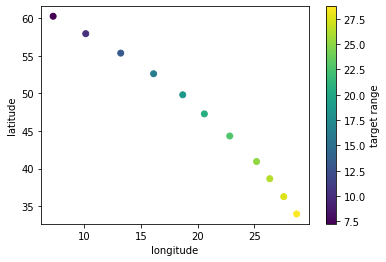

In [202]:
fig, ax = plt.subplots()

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

im = ax.scatter(lon, lat, c=target_range)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('target range');


## Get the lidvids of the selected products

In [203]:
lidvids = [product['id'] for product in products_data_dicts]
print(f'The lidvids of the selected products are {lidvids}')

The lidvids of the selected products are ['urn:nasa:pds:orex.ovirs:data_calibrated:20190511t045550s713_ovr_scil2.fits::1.0', 'urn:nasa:pds:orex.ovirs:data_calibrated:20190511t045551s613_ovr_scil2.fits::1.0', 'urn:nasa:pds:orex.ovirs:data_calibrated:20190511t045552s513_ovr_scil2.fits::1.0', 'urn:nasa:pds:orex.ovirs:data_calibrated:20190511t045553s413_ovr_scil2.fits::1.0', 'urn:nasa:pds:orex.ovirs:data_calibrated:20190511t045554s413_ovr_scil2.fits::1.0', 'urn:nasa:pds:orex.ovirs:data_calibrated:20190511t045555s313_ovr_scil2.fits::1.0', 'urn:nasa:pds:orex.ovirs:data_calibrated:20190511t045556s213_ovr_scil2.fits::1.0', 'urn:nasa:pds:orex.ovirs:data_calibrated:20190511t045557s113_ovr_scil2.fits::1.0', 'urn:nasa:pds:orex.ovirs:data_calibrated:20190511t045558s013_ovr_scil2.fits::1.0', 'urn:nasa:pds:orex.ovirs:data_calibrated:20190511t045558s913_ovr_scil2.fits::1.0', 'urn:nasa:pds:orex.ovirs:data_calibrated:20190511t045559s813_ovr_scil2.fits::1.0']


## Get the full product description

In [204]:
# TODO could replace with a single line with a /data end-point
products_api = pds_api.ProductsApi(api_client)

lidvid = lidvids[-1]

product = products_api.products_by_lidvid(lidvid)

## Extract the link to the data file

In [184]:
data_file = product.to_dict()['properties']['ops:Data_File_Info.ops:file_ref']
# TODO remove this line when data is rproperly e-ingested in the registry
data_file = data_file.replace('/data/local/starbase/data/pds4/test-data/registry/', 'https://pds-gamma.jpl.nasa.gov/data/pds4/test-data/registry/')
print(f'product data file url: {data_file}')

product data file url: https://pds-gamma.jpl.nasa.gov/data/pds4/test-data/registry/orex.ovirs/data_calibrated/bennu_original_calibration/detailed_survey/20190511T045559S813_ovr_scil2.fits


## Plot the data (fits file)

Filename: /Users/loubrieu/.astropy/cache/download/url/84c8bd6e4ceb6bfada913d43e5c429d8/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      45   (512, 20, 1)   float64   
  1  QUALITY       1 ImageHDU         9   (512, 20, 1)   int32   
  2  WAVELENGTH    1 ImageHDU         9   (512, 20, 3)   float64   
  3  CAL_DARK      1 ImageHDU         9   (512, 20, 1)   float64   


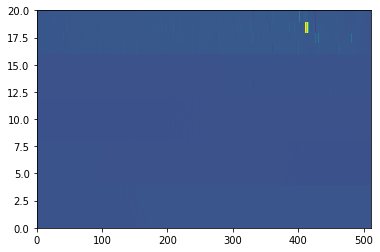

In [179]:
hdul = fits.open(data_file)
hdul.info()
img = hdul[0].data[0, :, :]
fig, ax = plt.subplots()
ax.pcolormesh(img)